Timeseries model on https://www.kaggle.com/competitions/acea-water-prediction


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Aquifer_Petrignano.csv to Aquifer_Petrignano.csv


In [ ]:
import pandas as pd
df= pd.read_csv("/content/Aquifer_Petrignano.csv")

In [ ]:
df.isnull().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [ ]:
df.notnull().sum()

Date                                    5223
Rainfall_Bastia_Umbra                   4199
Depth_to_Groundwater_P24                5168
Depth_to_Groundwater_P25                5184
Temperature_Bastia_Umbra                4199
Temperature_Petrignano                  4199
Volume_C10_Petrignano                   5025
Hydrometry_Fiume_Chiascio_Petrignano    4199
dtype: int64

In [ ]:
df=df.drop(["Rainfall_Bastia_Umbra","Depth_to_Groundwater_P24"],axis=1)

In [ ]:
df.columns

Index(['Date', 'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

In [ ]:
from numpy import NaN
for j,i in enumerate(df["Temperature_Bastia_Umbra"]):
  if i is None:
    a=j
    break

In [ ]:
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

targets = ['depth_to_groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,14/03/2006,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,-22.04,NaN,NaN,NaN,NaN


In [ ]:
from datetime import datetime, date

df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')

In [ ]:
X=df.drop(['date','depth_to_groundwater'],axis=1)

In [ ]:
X

,rainfall,temperature,drainage_volume,river_hydrometry
0,-22.18,NaN,NaN,NaN
1,-22.14,NaN,NaN,NaN
2,-22.04,NaN,NaN,NaN
3,-22.04,NaN,NaN,NaN
4,-22.04,NaN,NaN,NaN
...,...,...,...,...
5218,-25.07,24.5,-29930.688,2.5
5219,-25.11,25.0,-31332.960,2.4
5220,-25.19,25.7,-32120.928,2.4
5221,-25.18,26.0,-30602.880,2.4


In [ ]:
y=df['depth_to_groundwater']

In [ ]:
X.fillna(method='bfill',inplace=True)

In [ ]:
y.fillna(method='bfill',inplace=True)

In [ ]:
X.isnull().sum()

rainfall            0
temperature         0
drainage_volume     0
river_hydrometry    0
dtype: int64

In [ ]:
window_size=7

NameError: ignored

In [ ]:
for i in range(window_size):
   df[f"groundwater_before+{i+1}"]=df[f"depth_to_groundwater"].shift(periods=i+1)

df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,groundwater_before+1,groundwater_before+2,groundwater_before+3,groundwater_before+4,groundwater_before+5,groundwater_before+6,groundwater_before+7
0,2006-03-14,-22.18,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-03-15,-22.14,5.2,NaN,NaN,NaN,5.2,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-03-16,-22.04,5.2,NaN,NaN,NaN,5.2,5.2,NaN,NaN,NaN,NaN,NaN
3,2006-03-17,-22.04,5.2,NaN,NaN,NaN,5.2,5.2,5.2,NaN,NaN,NaN,NaN
4,2006-03-18,-22.04,5.2,NaN,NaN,NaN,5.2,5.2,5.2,5.2,NaN,NaN,NaN


In [ ]:
import numpy as np


X=df.dropna().drop(["depth_to_groundwater","date"],axis=1).astype(np.float32)
y=df.dropna()["depth_to_groundwater"].astype(np.float32)

In [ ]:
date=df.dropna()["date"]

In [ ]:
len(X.columns)

11

In [ ]:

split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(3336, 3336, 835, 835)

In [ ]:
date=date[split_size:]

In [ ]:
len(date)

835

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

tf.random.set_seed(42)
inputs=layers.Input(shape=(11,))
x=layers.Dense(256,activation="relu")(inputs)
x=layers.Dense(256,activation="relu")(x)
x=layers.Dense(128,activation="relu")(x)
outputs=layers.Dense(1)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="test_model")
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam())
model.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 101,889
Trainable params: 101,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train,
            epochs=100,
            batch_size=128,

            verbose=1, # only print 1 line per epoch
            validation_data=(X_test, y_test))

Epoch 1/100
27/27 [==============================] - 1s 13ms/step - loss: 794.5861 - val_loss: 203.3634
Epoch 2/100
27/27 [==============================] - 0s 9ms/step - loss: 199.7025 - val_loss: 385.5754
Epoch 3/100
27/27 [==============================] - 0s 13ms/step - loss: 210.2550 - val_loss: 163.3214
Epoch 4/100
27/27 [==============================] - 0s 13ms/step - loss: 95.7054 - val_loss: 113.7169
Epoch 5/100
27/27 [==============================] - 0s 12ms/step - loss: 85.9962 - val_loss: 43.8147
Epoch 6/100
27/27 [==============================] - 0s 13ms/step - loss: 47.0199 - val_loss: 46.7568
Epoch 7/100
27/27 [==============================] - 0s 12ms/step - loss: 47.0543 - val_loss: 53.3205
Epoch 8/100
27/27 [==============================] - 0s 14ms/step - loss: 81.5354 - val_loss: 177.1232
Epoch 9/100
27/27 [==============================] - 0s 13ms/step - loss: 123.2382 - val_loss: 68.1136
Epoch 10/100
27/27 [==============================] - 0s 11ms/step - loss:

In [ ]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 2ms/step - loss: 1.7452


1.7451766729354858

In [ ]:
y_pred=model.predict(X_test)

27/27 [==============================] - 0s 2ms/step


In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [ ]:
mr=evaluate_preds(y_test,y_pred)
mr

{'mae': array([ 9.325475 ,  8.5609045,  7.8642483,  7.730193 ,  7.4646597,
         7.4211955,  7.1619134,  7.0665245,  7.1052732,  6.981021 ,
         6.9521656,  7.1225142,  7.422316 ,  7.6200705,  7.903398 ,
         8.397561 ,  8.630096 ,  8.987292 ,  9.244762 ,  9.082314 ,
         8.794279 ,  8.542864 ,  7.7157774,  7.2307253,  6.981585 ,
         6.9639764,  6.8549795,  6.7201056,  6.6296535,  6.586511 ,
         6.578915 ,  6.5766077,  6.494352 ,  6.4873586,  6.449503 ,
         6.433859 ,  6.4260974,  6.4051995,  6.372807 ,  6.350212 ,
         6.3483815,  6.3385677,  6.3398595,  6.363315 ,  6.435981 ,
         6.51279  ,  6.617265 ,  6.6712675,  6.733401 ,  6.755131 ,
         6.8254   ,  6.854096 ,  6.9736466,  7.0602136,  7.0402923,
         6.779041 ,  6.6999326,  6.6812196,  6.7024565,  6.7019434,
         6.566913 ,  6.51575  ,  6.492702 ,  6.519149 ,  6.5651197,
         6.6294   ,  6.6291637,  6.6250176,  6.54248  ,  6.3884764,
         6.3597593,  6.367391 ,  6.379844

In [ ]:
import matplotlib.pyplot as plt
def plot_time_series(timesteps, values, format='-', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)


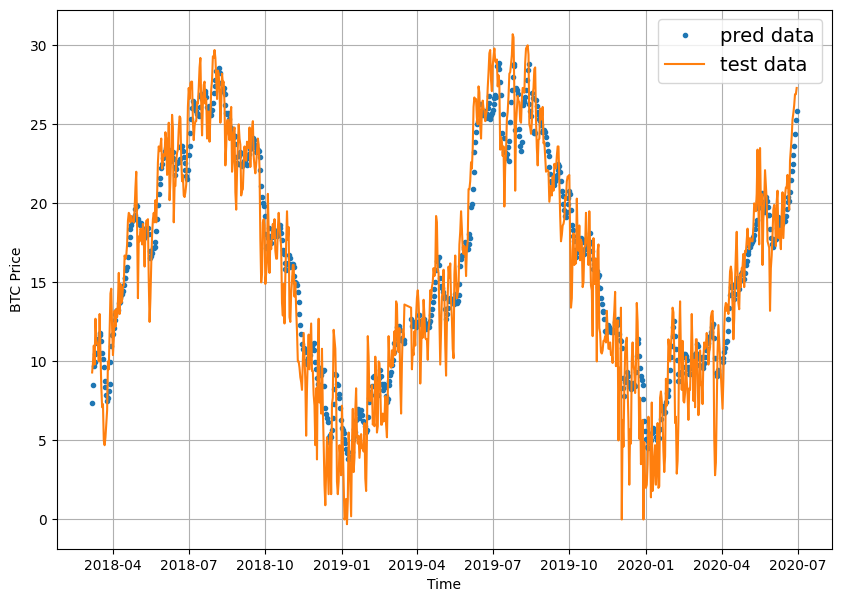

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=date, values=y_pred,label="pred data",format='.')
plot_time_series(timesteps=date, values=y_test,label="test data")



In [ ]:
WINDOW_SIZE=7
HORIZON=1
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())



In [ ]:
model_5.summary()

Model: "model_5_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               69632     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

tf.random.set_seed(42)
inputs=layers.Input(shape=(11,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(256, activation="relu")(x)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(x)
x = layers.LSTM(128, activation="relu")(x)
x=layers.Dense(64, activation="relu")(x)
outputs=layers.Dense(1)(x)

model_1 = keras.Model(inputs=inputs, outputs=outputs, name="test_model")
model_1.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam())
model_1.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 11)]              0         
                                                                 
 lambda_7 (Lambda)           (None, 1, 11)             0         
                                                                 
 lstm_9 (LSTM)               (None, 256)               274432    
                                                                 
 lambda_8 (Lambda)           (None, 1, 256)            0         
                                                                 
 lstm_10 (LSTM)              (None, 128)               197120    
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 1)                 6

In [ ]:
history1=model_1.fit(X_train, y_train,
            epochs=100,
            batch_size=128,

            verbose=1, # only print 1 line per epoch
            validation_data=(X_test, y_test))

Epoch 1/100
27/27 [==============================] - 5s 56ms/step - loss: 10.3866 - val_loss: 6.4244
Epoch 2/100
27/27 [==============================] - 1s 24ms/step - loss: 7.1845 - val_loss: 8.0595
Epoch 3/100
27/27 [==============================] - 1s 22ms/step - loss: 8.1767 - val_loss: 5.7912
Epoch 4/100
27/27 [==============================] - 1s 23ms/step - loss: 6.5171 - val_loss: 7.8963
Epoch 5/100
27/27 [==============================] - 1s 23ms/step - loss: 10.9841 - val_loss: 5.0801
Epoch 6/100
27/27 [==============================] - 1s 22ms/step - loss: 13.2881 - val_loss: 7.3192
Epoch 7/100
27/27 [==============================] - 1s 22ms/step - loss: 6.0691 - val_loss: 6.7556
Epoch 8/100
27/27 [==============================] - 1s 22ms/step - loss: 6.1302 - val_loss: 5.0788
Epoch 9/100
27/27 [==============================] - 1s 22ms/step - loss: 5.4488 - val_loss: 4.6401
Epoch 10/100
27/27 [==============================] - 1s 23ms/step - loss: 9.8548 - val_loss: 5.8

In [ ]:
y_preds=model.predict(X_test)

27/27 [==============================] - 0s 2ms/step


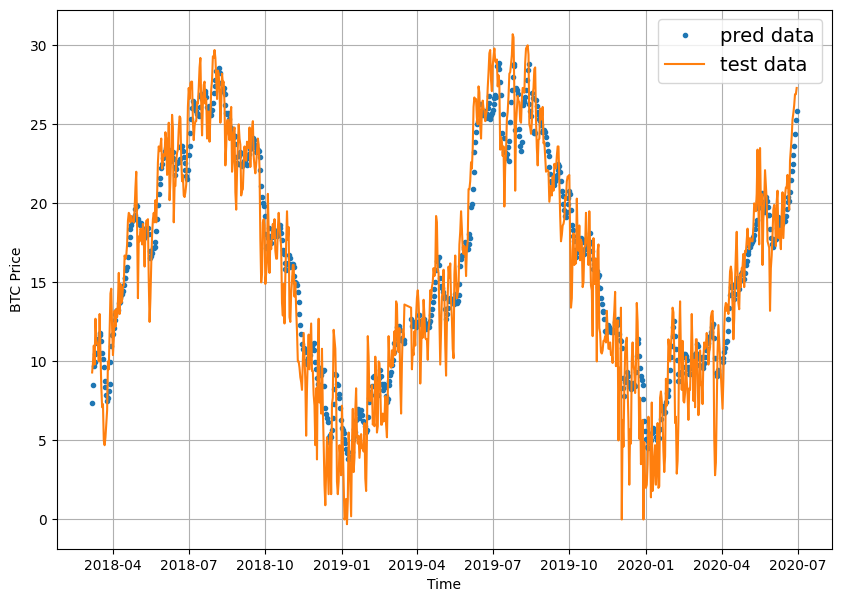

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=date, values=y_preds,label="pred data",format='.')
plot_time_series(timesteps=date, values=y_test,label="test data")

